In [1]:
import pandas as pd

In [2]:
import pandas as pd
#Reading bit by bit since data is too large 
chunk_size = 500000
# Initialize an empty list to collect chunks
chunks = []
for chunk in pd.read_csv('eda.csv', chunksize=chunk_size):
    chunks.append(chunk)
#Convert to dataframe
df = pd.concat(chunks, ignore_index=True)

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tip_amount_transformed,pickup_week,pickup_date,day_of_week,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,0.422371,238,239,1.0,0.237510,3.0,0.5,...,0.410110,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.783961,-73.978632
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,0.422371,239,238,1.0,0.277161,3.0,0.5,...,0.433048,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.783961,-73.978632,40.791705,-73.973049
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.322204,238,238,1.0,0.237510,3.0,0.5,...,0.000000,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.791705,-73.973049
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.355593,238,151,1.0,0.217684,0.5,0.5,...,0.323179,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.797962,-73.968168
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.222037,193,193,2.0,0.138382,0.5,0.5,...,0.000000,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.760314,-73.941997,40.760314,-73.941997


In [4]:
df.shape

(5321529, 51)

In [5]:
df1 = df

In [6]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [7]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_type', 'pickup_week', 'pickup_date', 'day_of_week']
df1 = df1.drop(columns=columns_to_drop)

In [8]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [9]:
df1.to_csv('eda1.csv', index = False)

In [10]:
from sklearn.preprocessing import StandardScaler
chunk_size = 500000
numerical_cols = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 
    'fare_per_mile', 'avg_fare_per_pulocation', 'avg_fare_per_dolocation', 
    'trip_duration', 'log_trip_distance', 'log_trip_duration', 
    'log_fare_amount', 'log_tip_amount', 'boxcox_trip_distance', 
    'boxcox_trip_duration', 'boxcox_fare_amount', 'boxcox_tip_amount',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
]

scaler = StandardScaler()

In [11]:
for chunk in pd.read_csv('eda1.csv', usecols=numerical_cols, chunksize=chunk_size):
    scaler.partial_fit(chunk)

In [12]:
scaled_chunks = []
for chunk in pd.read_csv('eda1.csv', chunksize=chunk_size):
    chunk[numerical_cols] = scaler.transform(chunk[numerical_cols])
    scaled_chunks.append(chunk)

In [13]:
#Now we save the scaled values into a dataframe for future use

df2 = pd.concat(scaled_chunks, ignore_index=True)

In [14]:
df2.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,boxcox_fare_amount,boxcox_tip_amount,tip_given,tip_amount_transformed,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.0,-0.446200,238,239,1.0,-0.767335,1.527338,0.038378,-0.141140,-0.032898,...,-0.767968,0.007112,1,0.410110,0,1,1.551130,0.252161,1.121102,-0.069330
1,1.0,-0.446200,239,238,1.0,-0.499769,1.527338,0.038378,-0.122839,-0.032898,...,-0.395814,0.029080,1,0.433048,0,1,1.212009,-0.012898,1.441136,0.187912
2,1.0,-1.057243,238,238,1.0,-0.767335,1.527338,0.038378,-0.427856,-0.032898,...,-0.767968,-0.362171,1,0.000000,0,1,1.551130,0.252161,1.441136,0.187912
3,1.0,-0.853562,238,151,1.0,-0.901117,-0.502998,0.038378,-0.208244,-0.032898,...,-0.970941,-0.074944,1,0.323179,0,1,1.551130,0.252161,1.699736,0.412787
4,1.0,-1.668286,193,193,2.0,-1.436249,-0.502998,0.038378,-1.037889,-0.032898,...,-1.917596,-1.397853,0,0.000000,0,1,0.176372,1.726368,0.143756,1.618643


### Here optionally if needed we can save the scaled down csv, but for now we will not be doing that

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
chunk_size = 500000

In [3]:
#setting variables

train_size = 0.6
validation_size = 0.2
test_size = 0.2

In [4]:
#Lists to hold the splitted data

train_chunks = []
validation_chunks = []
test_chunks = []

In [5]:
#Forecfully have to save the scaled file since I failed to use the dataframe for the train test split :(

# df2.to_csv('scaled_eda1.csv', index = False)

In [6]:
df3 = pd.read_csv('scaled_eda1.csv')

In [7]:
for chunk in pd.read_csv('scaled_eda1.csv', chunksize=chunk_size):
    train, temp = train_test_split(chunk, test_size=(1 - train_size))
    validation, test = train_test_split(temp, test_size=(test_size / (test_size + validation_size)))
    
    train_chunks.append(train)
    validation_chunks.append(validation)
    test_chunks.append(test)

# Individual dataframes
train_df = pd.concat(train_chunks, ignore_index=True)
validation_df = pd.concat(validation_chunks, ignore_index=True)
test_df = pd.concat(test_chunks, ignore_index=True)

# Separate csv files for idk maybe useful
# train_df.to_csv('train1.csv', index=False)
# validation_df.to_csv('validation1.csv', index=False)
# test_df.to_csv('test1.csv', index=False)

In [8]:
print(f'The training dataset is : {train_df.shape}')
print(f'The validation dataset is : {validation_df.shape}')
print(f'The testing dataset is : {test_df.shape}')

The training dataset is : (3192917, 45)
The validation dataset is : (1064306, 45)
The testing dataset is : (1064306, 45)


### Using a simple model to get a performance benchmark here we are taking Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(train_df.drop('fare_amount', axis=1), train_df['fare_amount'])

LinearRegression()

In [ ]:
# Predict on the validation data
val_predictions = linear_model.predict(validation_df.drop('fare_amount', axis=1))

# Evaluate the model's performance
mae = mean_absolute_error(validation_df['fare_amount'], val_predictions)
mse = mean_squared_error(validation_df['fare_amount'], val_predictions)
rmse = mse ** 0.5
r2 = r2_score(validation_df['fare_amount'], val_predictions)

print(f"Linear Regression Performance on Validation Set:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Linear Regression Performance on Validation Set:
MAE: 0.006042820188827471
MSE: 8.882034091049477e-05
RMSE: 0.009424454409168457
R-squared: 0.999911328018531


## Scatter Plot: Actual vs. Predicted Values

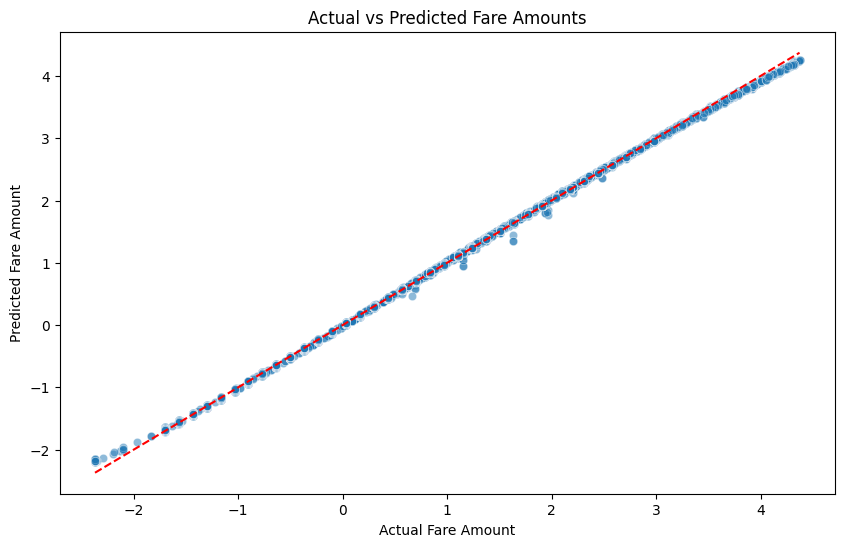

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=validation_df['fare_amount'], y=val_predictions, alpha=0.5)

# Adding a diagonal line for perfect prediction
plt.plot([validation_df['fare_amount'].min(), validation_df['fare_amount'].max()],
         [validation_df['fare_amount'].min(), validation_df['fare_amount'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amounts')
plt.show()

## Residual Plot: Prediction Errors

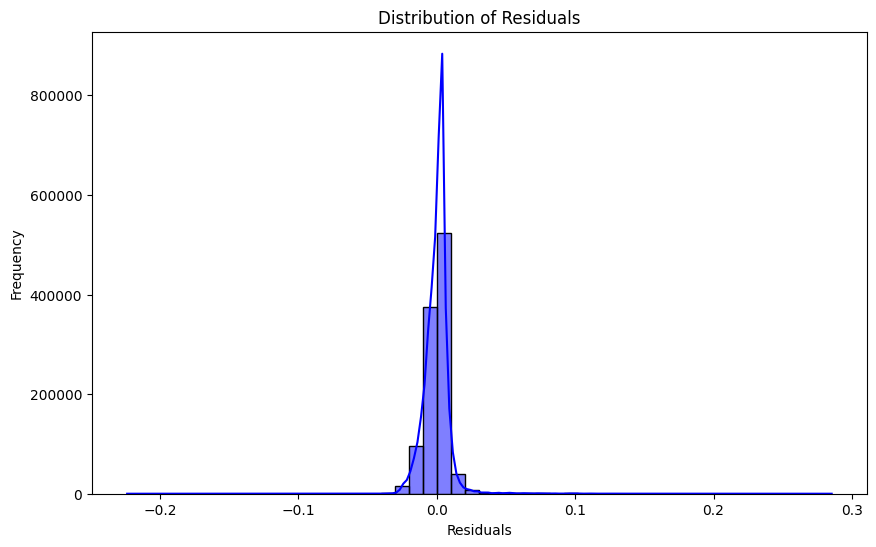

In [15]:
# Residuals
residuals = validation_df['fare_amount'] - val_predictions

# Residual plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=50)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

## Error Metrics Bar Chart

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3520\2344191398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


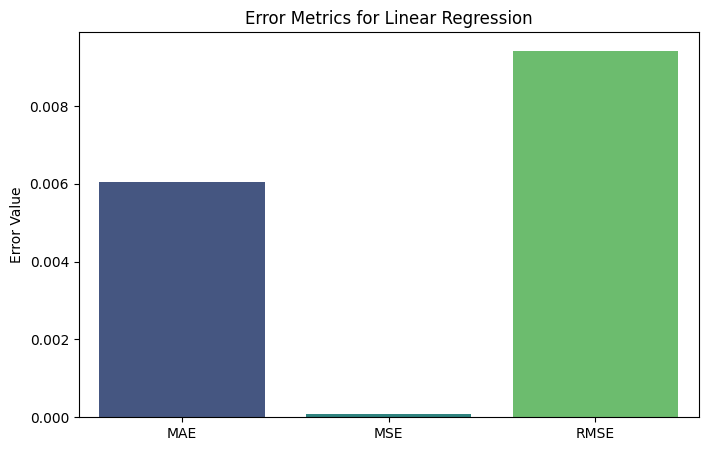

In [16]:
# Error metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')

plt.ylabel('Error Value')
plt.title('Error Metrics for Linear Regression')
plt.show()

## Evaluate the model on the Test Set

In [17]:
test_predictions = linear_model.predict(test_df.drop('fare_amount', axis=1))

# Evaluate the model's performance on the test set
test_mae = mean_absolute_error(test_df['fare_amount'], test_predictions)
test_mse = mean_squared_error(test_df['fare_amount'], test_predictions)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(test_df['fare_amount'], test_predictions)

# Display the results
print(f"Linear Regression Performance on Test Set:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R-squared: {test_r2}")

Linear Regression Performance on Test Set:
MAE: 0.00602871164357014
MSE: 8.899956562465872e-05
RMSE: 0.009433958110181469
R-squared: 0.9999109560130097


## Scatter plot of actual vs predicted values on test set

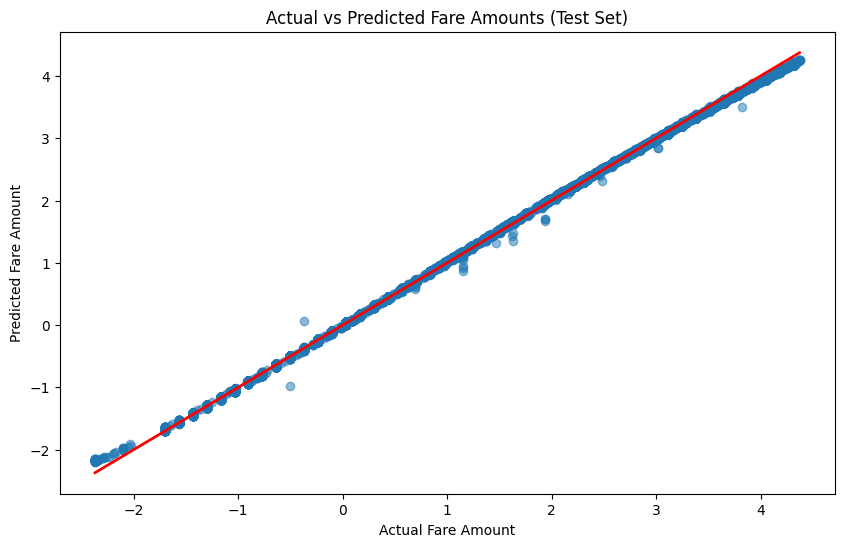

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(test_df['fare_amount'], test_predictions, alpha=0.5)
plt.plot([test_df['fare_amount'].min(), test_df['fare_amount'].max()],
         [test_df['fare_amount'].min(), test_df['fare_amount'].max()],
         'r', lw=2)
plt.title('Actual vs Predicted Fare Amounts (Test Set)')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.show()

## Residual plot on test set

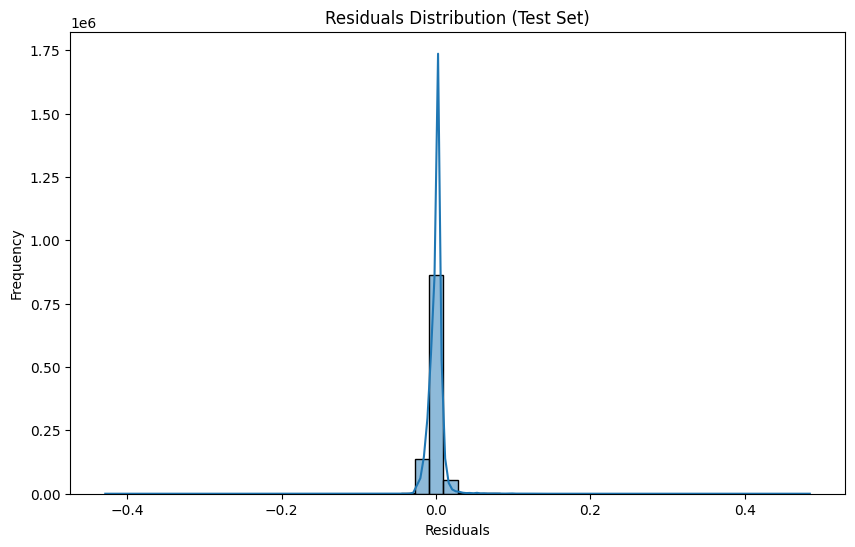

In [19]:
residuals = test_df['fare_amount'] - test_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals Distribution (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Error metrics bar chart on test set

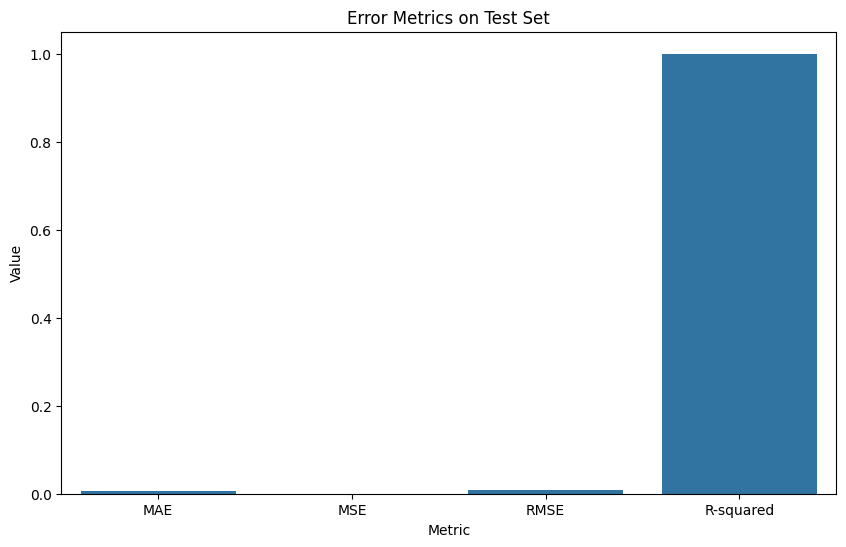

In [20]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [test_mae, test_mse, test_rmse, test_r2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Error Metrics on Test Set')
plt.show()

## Conclusion and Documentation for Linear Regression model to be done later 

---

In [10]:
df3.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,boxcox_fare_amount,boxcox_tip_amount,tip_given,tip_amount_transformed,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.0,-0.446200,238,239,1.0,-0.767335,1.527338,0.038378,-0.141140,-0.032898,...,-0.767968,0.007112,1,0.410110,0,1,1.551130,0.252161,1.121102,-0.069330
1,1.0,-0.446200,239,238,1.0,-0.499769,1.527338,0.038378,-0.122839,-0.032898,...,-0.395814,0.029080,1,0.433048,0,1,1.212009,-0.012898,1.441136,0.187912
2,1.0,-1.057243,238,238,1.0,-0.767335,1.527338,0.038378,-0.427856,-0.032898,...,-0.767968,-0.362171,1,0.000000,0,1,1.551130,0.252161,1.441136,0.187912
3,1.0,-0.853562,238,151,1.0,-0.901117,-0.502998,0.038378,-0.208244,-0.032898,...,-0.970941,-0.074944,1,0.323179,0,1,1.551130,0.252161,1.699736,0.412787
4,1.0,-1.668286,193,193,2.0,-1.436249,-0.502998,0.038378,-1.037889,-0.032898,...,-1.917596,-1.397853,0,0.000000,0,1,0.176372,1.726368,0.143756,1.618643


### Analyzing the feature importance (Which features are contributing the most)

In [12]:
feature_importance = pd.DataFrame({
    'feature': train_df.drop('fare_amount', axis=1).columns,
    'importance': abs(linear_model.coef_)
}).sort_values('importance', ascending=False)

In [29]:
imp = feature_importance.sort_values(['importance'], ascending = [0])

In [30]:
imp #Will look into the interpretation of these values later on

,feature,importance
20,pickup_hour,3.425788e+06
38,hour,3.425788e+06
39,month,1.313082e+03
22,pickup_month,1.313082e+03
30,log_fare_amount,1.422477e+00
28,log_trip_distance,7.051895e-01
1,trip_distance,5.136856e-01
34,boxcox_fare_amount,4.192692e-01
32,boxcox_trip_distance,1.844649e-01
29,log_trip_duration,1.696679e-01


# vif_results = calculate_vif(X)
# print(vif_results)

# Got numeric value error so making changes to the code

In [57]:
df3.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,boxcox_fare_amount,boxcox_tip_amount,tip_given,tip_amount_transformed,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.0,-0.446200,238,239,1.0,-0.767335,1.527338,0.038378,-0.141140,-0.032898,...,-0.767968,0.007112,1,0.410110,0,1,1.551130,0.252161,1.121102,-0.069330
1,1.0,-0.446200,239,238,1.0,-0.499769,1.527338,0.038378,-0.122839,-0.032898,...,-0.395814,0.029080,1,0.433048,0,1,1.212009,-0.012898,1.441136,0.187912
2,1.0,-1.057243,238,238,1.0,-0.767335,1.527338,0.038378,-0.427856,-0.032898,...,-0.767968,-0.362171,1,0.000000,0,1,1.551130,0.252161,1.441136,0.187912
3,1.0,-0.853562,238,151,1.0,-0.901117,-0.502998,0.038378,-0.208244,-0.032898,...,-0.970941,-0.074944,1,0.323179,0,1,1.551130,0.252161,1.699736,0.412787
4,1.0,-1.668286,193,193,2.0,-1.436249,-0.502998,0.038378,-1.037889,-0.032898,...,-1.917596,-1.397853,0,0.000000,0,1,0.176372,1.726368,0.143756,1.618643


In [58]:
print(df3.columns)
print(df3.dtypes)

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'tip_percentage', 'fare_per_mile', 'avg_fare_per_pulocation',
       'avg_fare_per_dolocation', 'ratecode_negotiated_fare',
       'ratecode_group_ride', 'ratecode_shared_ride', 'ratecode_other',
       'ratecode_special_rates', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_day_of_week', 'is_peak_hour', 'is_weekend', 'same_zone',
       'trip_duration', 'log_trip_distance', 'log_trip_duration',
       'log_fare_amount', 'log_tip_amount', 'boxcox_trip_distance',
       'boxcox_trip_duration', 'boxcox_fare_amount', 'boxcox_tip_amount',
       'tip_given', 'tip_amount_transformed', 'hour', 'month',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude'],
      dtype='object')
passenger_count             float64
trip

In [59]:
#Calculating the multicollinearity
def calculate_vif(df):
    for col in df.select_dtypes(include=['bool']):
        df[col] = df[col].astype(int)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_cols
    
    # Calculate VIF for each numeric column
    vif_data["VIF"] = [variance_inflation_factor(df[numeric_cols].values, i) 
                       for i in range(len(numeric_cols))]
    
    return vif_data.sort_values('VIF', ascending=False)

In [60]:
sample_df = df3.sample(n=100000, random_state=42)

In [61]:
print('fare_amount' in sample_df.columns)

True


In [62]:
X = sample_df.drop('fare_amount', axis = True)

In [63]:
print('fare_amount' in X.columns)

False


In [65]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [66]:
vif_results = calculate_vif(X)

In [67]:
print(vif_results)

                     feature           VIF
22              pickup_month           inf
39                     month           inf
20               pickup_hour           inf
38                      hour           inf
29         log_trip_duration  5.712868e+05
33      boxcox_trip_duration  3.139006e+05
27             trip_duration  3.929264e+04
28         log_trip_distance  1.746181e+04
1              trip_distance  9.766191e+03
31            log_tip_amount  1.398144e+03
32      boxcox_trip_distance  1.281625e+03
35         boxcox_tip_amount  1.027965e+03
36                 tip_given  3.657571e+02
37    tip_amount_transformed  2.251171e+02
30           log_fare_amount  1.335487e+02
34        boxcox_fare_amount  1.086766e+02
4               payment_type  9.349011e+01
11            tip_percentage  2.458422e+01
7                 tip_amount  1.851295e+01
23        pickup_day_of_week  8.299325e+00
2               PULocationID  8.178384e+00
3               DOLocationID  7.572119e+00
12         